In [1]:
library(caret)
library(plot3D)
library(ggplot2)
library(party)

Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'party' was built under R version 3.6.2"Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.2"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.2"

In [2]:
head(iris)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

In [3]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Moyenne des variables descriptives par espèce 

In [4]:
aggregate(iris[,1:4], list(iris$Species), FUN=mean)

Group.1    Sepal.Length Sepal.Width Petal.Length Petal.Width
1 setosa     5.006        3.428       1.462        0.246      
2 versicolor 5.936        2.770       4.260        1.326      
3 virginica  6.588        2.974       5.552        2.026

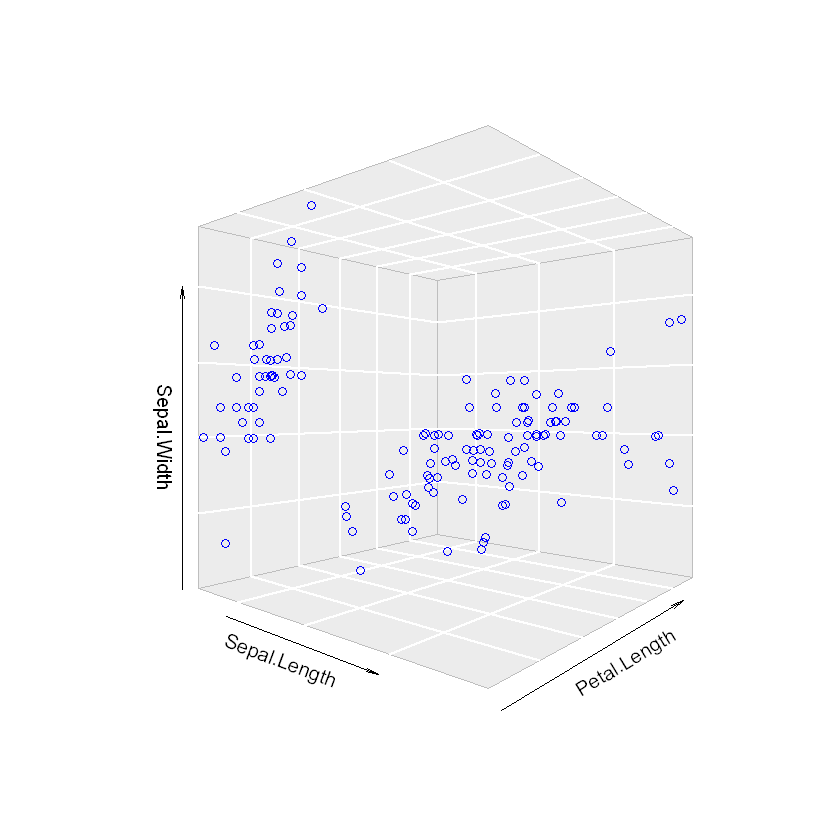

In [5]:
scatter3D(
    iris$Sepal.Length,iris$Petal.Length, iris$Sepal.Width, 
    phi = 0, bty ="g", col="blue", scale=T,
    xlab = "Sepal.Length", ylab = "Petal.Length", zlab = "Sepal.Width"
)

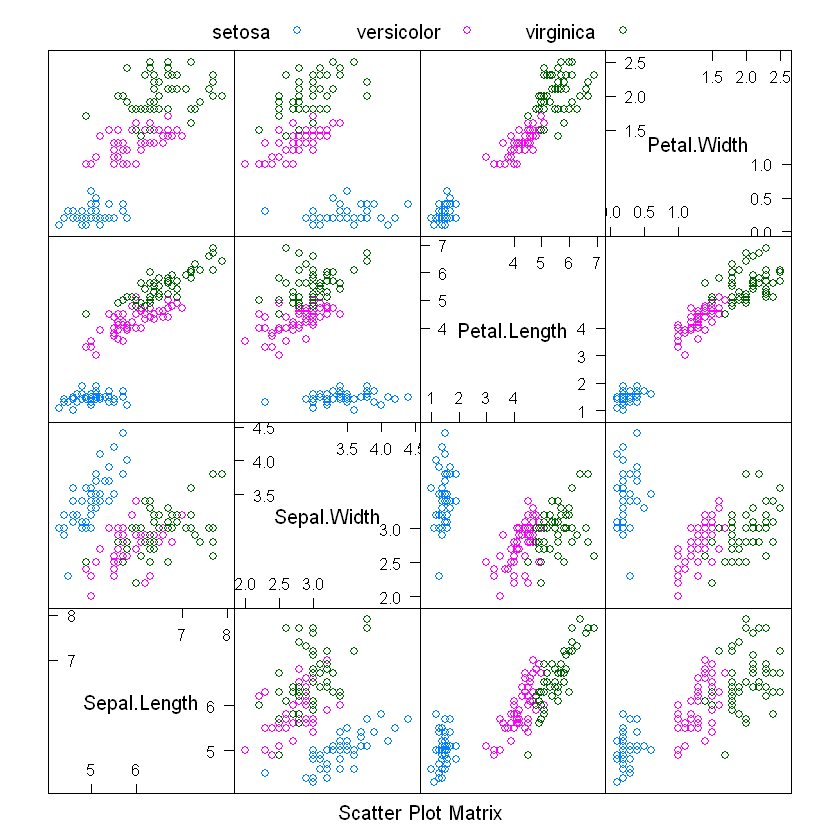

In [6]:
featurePlot(x = iris[, 1:4], 
            y = iris$Species, 
            plot = "pairs",
            ## Add a key at the top
            auto.key = list(columns = 3))

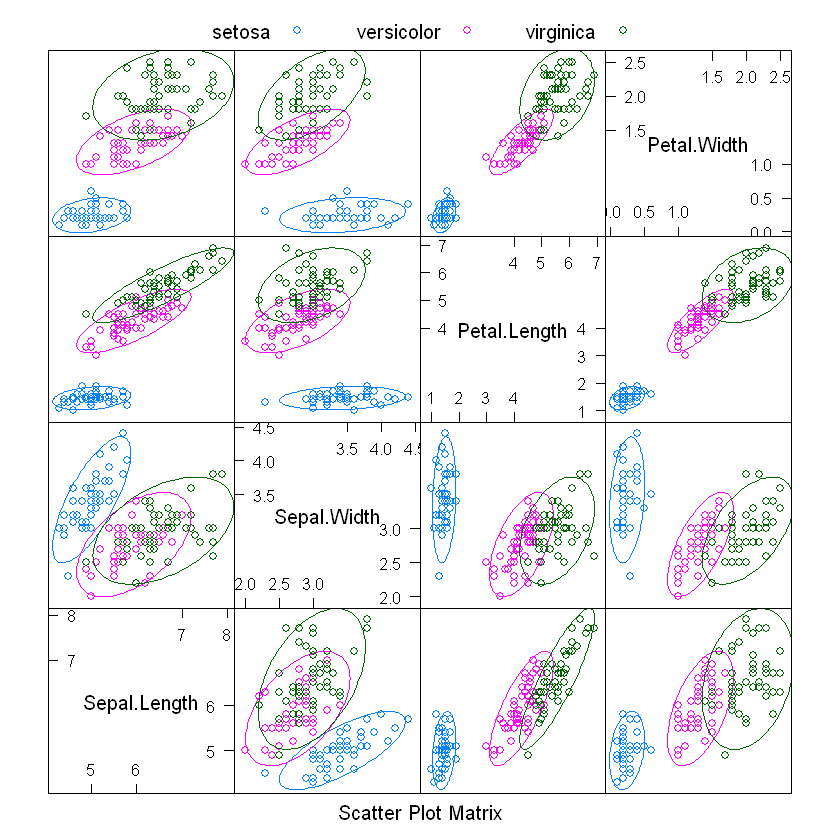

In [7]:
featurePlot(x = iris[, 1:4], 
            y = iris$Species, 
            plot = "ellipse",
            ## Add a key at the top
            auto.key = list(columns = 3))

In [8]:
featurePlot(x = iris[, 1:4], 
            y = factor(mm$cluster), 
            plot = "ellipse",
            ## Add a key at the top
            auto.key = list(columns = 3))

ERROR: Error in factor(mm$cluster): object 'mm' not found


# Régression Versus Classification 

Classification: Il s'agit de trouver une valeur discrète par exemple la class d'un ensemble de points 

Régression: il s'agit de trouver une valeur continue

In [ ]:
head(mtcars)

In [ ]:
mtcars$LiterPer100 <- 100/mtcars$mpg*3.8/1.6
mtcars$dispLiter <- mtcars$disp*16.38/1000

In [ ]:
p <- ggplot(mtcars, aes(dispLiter, LiterPer100))
p <- p + geom_line(colour = "red") 
p <- p + geom_point(colour = "blue", size = 2) 
show(p)

In [ ]:
droite <- coefficients(glm(LiterPer100~dispLiter,data=mtcars))

In [ ]:
p <- p + geom_abline(intercept = droite[1], slope = droite[2], size=1) 

In [ ]:
show(p)

In [ ]:
droite

Pour trouver la droite qui passe au mieux entre les points on minimise la fonction suivante:

\begin{align}
rmse = \sqrt{\frac{1}{N}\sum_{i=1}^N (y_{i}-\tilde{y}_{i})}
\end{align}

avec:
 - rmse: root mean sqaure error
 - $y_{i}$: valeur de l'abcisse des points "experimentaux"
 - $\tilde{y}_{i}$: valeur de l'abcisse de la draite 

En ce qui concerne la classiffication on peux proceder d'une manière semblable: on minimise une certaine fonction. Par exemple pour l'olgorithme kmeans on minimise la somme des carrées intra-cluster:


\begin{align}
\underset{S}{arg\,min}\sum_{i=1}^k\sum_{\mathbf{x} \in S}\parallel \mathbf{x}-\mathbf{\mu}_{i} \parallel
\end{align}


![kmeans](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

D'une manière générale on peux dire que différentes fonctions de coût mènent à de differents algorithms. 
Les RMSE donnent la regréssion linéaire, la somme des carrées intra-cluster donnent les kmeans. Par la suite on
verra d'autres algorithmes et fonctions de coût.

# Apprentissage Supervisé VS Apprentissage non Supervisé 

L'apprentissage non suparvisé: on applique un algorithme d'apprentissage automatique sans connaître à priorie les classes à prédire. Ainsi on cherche à découvrire la structure contenue dans les données sans connaître à priorie.
Exemple: Le clustering

Prenons le dataset iris sans la colonne classe  

In [12]:
irisUnclassed <- iris[,1:4]
head(irisUnclassed)

Sepal.Length Sepal.Width Petal.Length Petal.Width
1 5.1          3.5         1.4          0.2        
2 4.9          3.0         1.4          0.2        
3 4.7          3.2         1.3          0.2        
4 4.6          3.1         1.5          0.2        
5 5.0          3.6         1.4          0.2        
6 5.4          3.9         1.7          0.4

et dennons le "à manger" à l'algorithme kmeans, remarquons qu'on indique à l'algorithme le nombre de classes qu'on attend

In [13]:
predictions <- kmeans(iris[,1:4],3)

In [14]:
head(predictions$cluster)

[1] 1 1 1 1 1 1

In [15]:
table(predictions$cluster,iris$Species)

   
    setosa versicolor virginica
  1     50          0         0
  2      0         48        14
  3      0          2        36

Apprentissage supervisé: on applique un algorithme d'apprentissage automatique en utilisant la classe à prédire pour minimiser la fonction de coût 

Exemple avec les arbres de décision:

Les arbres de décisions est une class d'algorithms qui maximise le gain d'information entre classes: 


\begin{align}
I_{G}= -\sum_{i=1}^m f_{i}\log_{2} f_{i}
\end{align}

où m est le nombre de class et $f$ le fraction dans chaque feuille de l'arbre  

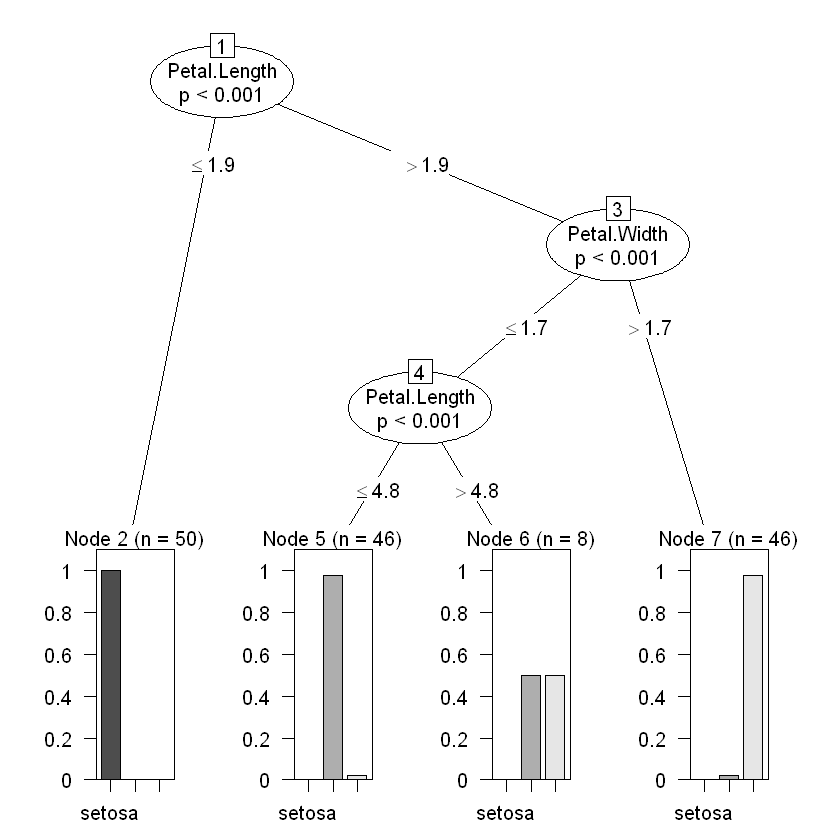

In [9]:
mytree <- ctree(Species~.,data=iris)
plot(mytree)

Chaque feuille de l'arbre est construite en maximisant le gain d'information.

In [17]:
tree_predictions = predict(mytree, newdata=irisUnclassed, type="response")

In [20]:
table(tree_predictions, iris$Species)

                
tree_predictions setosa versicolor virginica
      setosa         50          0         0
      versicolor      0         49         5
      virginica       0          1        45

# Echantillon d'apprentissage et échantillon test 

En régle générale lorsqu'on entraine un algorithm d'apprentissage automatique sur un échantillon de données on sépare ce dernier en deux: 
 - un echntillon d'apprentissage sur lequel l'algorithm sera entrainé 
 - un échantillon test sur lequel l'algorithm sera testé 
ceci est fait afin d'éviter le phénomène de sur apprentissage: le modèl donne de bonnes réponses sur l'échntillon sur lequel il à été entrainé mais se trompe sur de nouveaux individus.

En générale on sépare les individus dans la proportion de 70-80% pour l'échantillon d'apprentissage et 20-30% pour l'echantillon test. 

In [40]:
ind <- sample(2, nrow(iris), replace=TRUE, prob=c(0.7, 0.3)) 
trainir <- iris[ind==1,] 
testir <- irisUnclassed[ind==2,]

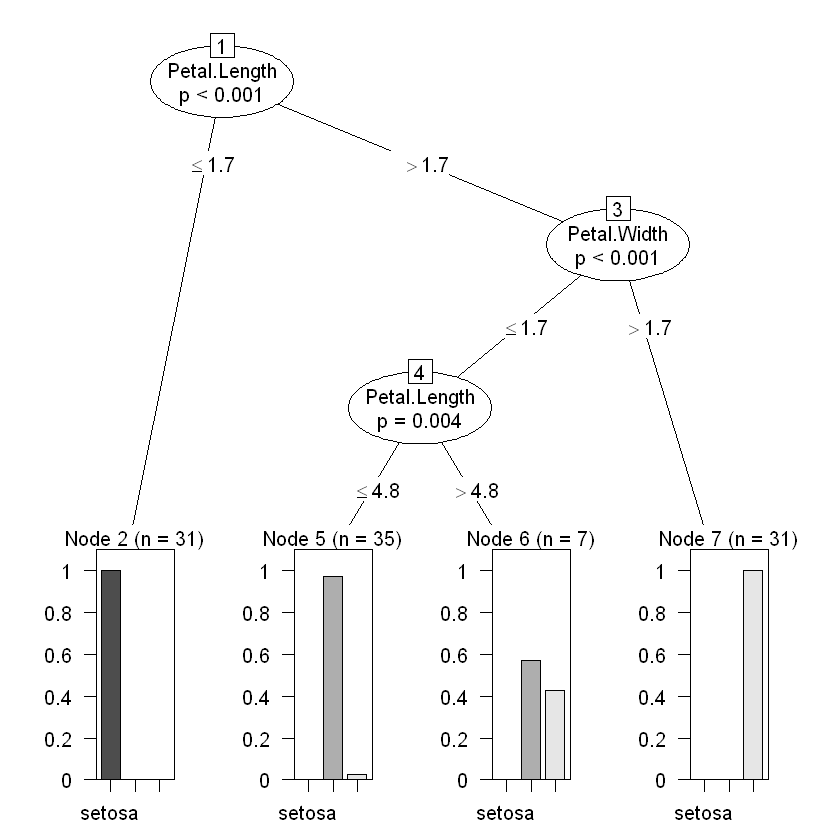

In [41]:
model = ctree(Species~.,data=trainir)
plot(model)

In [42]:
predictions = predict(mytree, newdata=testir, type="response")

In [43]:
table(predictions, iris[ind==2,]$Species)

            
predictions  setosa versicolor virginica
  setosa         19          0         0
  versicolor      0         11         1
  virginica       0          1        14

Ceci est fait pour éviter le phénomène de $surapprentissage$. 
 - surapprentissage: on parle d'un model en situation de surapprentissage lorsque celui-ci montre de très bon résultats sur l'échntillon d'apprentissage mais prédit mal en dehors de celui-ci  

![surrapprentissage](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Overfitting_regression.png/300px-Overfitting_regression.png)

# les métriques de performance des algorithmes

La performance des algorithms se mesure différamment s'il s'agit d'une régression ou d'une classification:
 - Pour la regression les rmse (root mean square error) sont souvent utilisés

\begin{align}
rmse = \sqrt{\frac{1}{N}\sum_{i=1}^N (y_{i}-\tilde{y}_{i})}
\end{align}

 - $y_{i}$: valeur de l'abcisse des points de l'echantillon test ou de l'echantillon d'apprentissage
 - $\tilde{y}_{i}$: valeur de l'abcisse de la drite 

Pour la classification on utilise d'autres métriques:
 - La précision 
 - le recall 
 - la F-measure 

ces métriques sont calculées à l'aide des notions suivantes 
- vrai positif (vp): individu prédit comme positif par l'algorithm et qui est effectivement positif 
- faux positif (fp): individu prédit comme positif par l'algorithm mais qui ne l'est pas 
- vrai négatif (vn): individu prédit comme négatif par l'algorithm et qui est effectivement négatif
- faux négatif (fn): individu prédit comme négatif par l'algorithm mais qui ne l'est pas

La précision mesure le nombre de bonnes réponses de l'algorithm sur le total des réponses
\begin{align}
    precision = \frac{vp}{vp+fp}
\end{align}

Le recall (le rappel) mesure le nombre d'individus classifiés comme appartenant à une class par l'algrithm sur le nombre d'individus appartenant effectivement à cette classe:
\begin{align}
    recall = \frac{vp}{vp+fn}
\end{align}

# Différents algorithms d'apprentissage automatique 

- Régression linéaire 